# Tasks for data visualization

* Visualizing linear relationships
* Functions to draw linear regression models
* Fitting different kinds of models
* Conditioning on other variables
* Controlling the size and shape of the plot
* Plotting a regression in other contexts

Sources:
* [Seaborn: Visualizing linear relationships](http://seaborn.pydata.org/tutorial/regression.html)


Datasets
* Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition.csv](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data), data from IBM HR Analytics Employee Attrition & Performance 

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from bokeh.charts import Bar, output_notebook, show

# 1. Load data

In [2]:
def read(fp):
    """
    Notes: 
        - Fields Over18, EmployeeCount, EmployeeNumber, StandardHours - seems don't make sense, drop them
        - Fields Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime - convert to Categorical datatype
    """
    df = (pd.read_csv(fp)
            .drop(["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)
            .assign(Attrition=lambda x: pd.Categorical(x['Attrition']),
                    BusinessTravel=lambda x: pd.Categorical(x['BusinessTravel']),
                    Department=lambda x: pd.Categorical(x['Department']),
                    EducationField=lambda x: pd.Categorical(x['EducationField']),
                    Gender=lambda x: pd.Categorical(x['Gender']),
                    JobRole=lambda x: pd.Categorical(x['JobRole']),
                    MaritalStatus=lambda x: pd.Categorical(x['MaritalStatus']),
                    OverTime=lambda x: pd.Categorical(x['OverTime'])
                   ))
    return df

In [3]:
df = read("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
# get columns numeric and categorical attributes
# details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html 

cols = df.columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = cols.drop(num_cols.tolist())

print("Numeric data columns: \n {} \n".format(num_cols.values))
print("Categorical data columns: \n {}".format(cat_cols.values))

Numeric data columns: 
 ['Age' 'DailyRate' 'DistanceFromHome' 'Education' 'EnvironmentSatisfaction'
 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'] 

Categorical data columns: 
 ['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
 'JobRole' 'MaritalStatus' 'OverTime']


## Explore numeric data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


# Functions to draw linear regression model



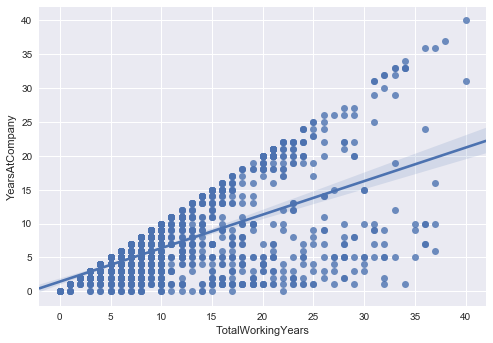

In [12]:
sns.regplot(x='TotalWorkingYears', y='YearsAtCompany',data=df)

# Conditioning on other variables

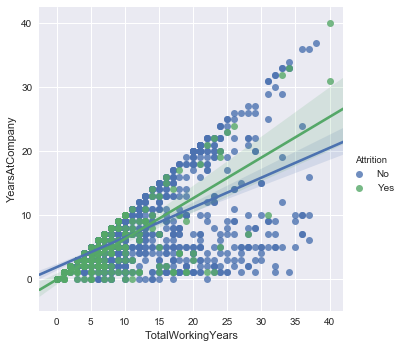

In [14]:
sns.lmplot(x='TotalWorkingYears', y='YearsAtCompany', hue='Attrition',
           data=df)

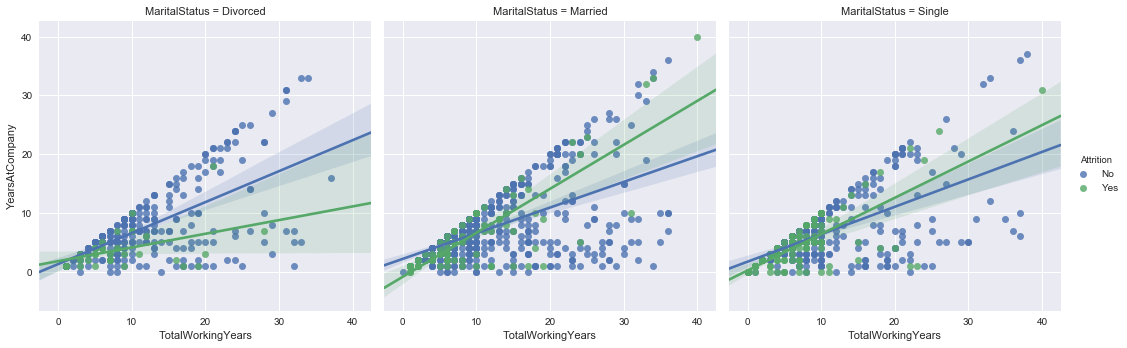

In [15]:
# To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

sns.lmplot(x='TotalWorkingYears', y='YearsAtCompany', hue='Attrition',
           data=df,
          col='MaritalStatus')

# Plotting a regression in other contexts

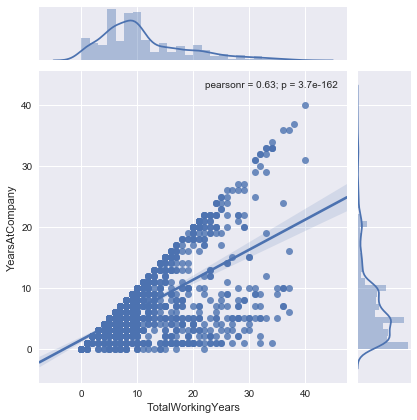

In [17]:
sns.jointplot(x='TotalWorkingYears', y='YearsAtCompany',
              data=df, 
              kind="reg")

## Correlation analysis 

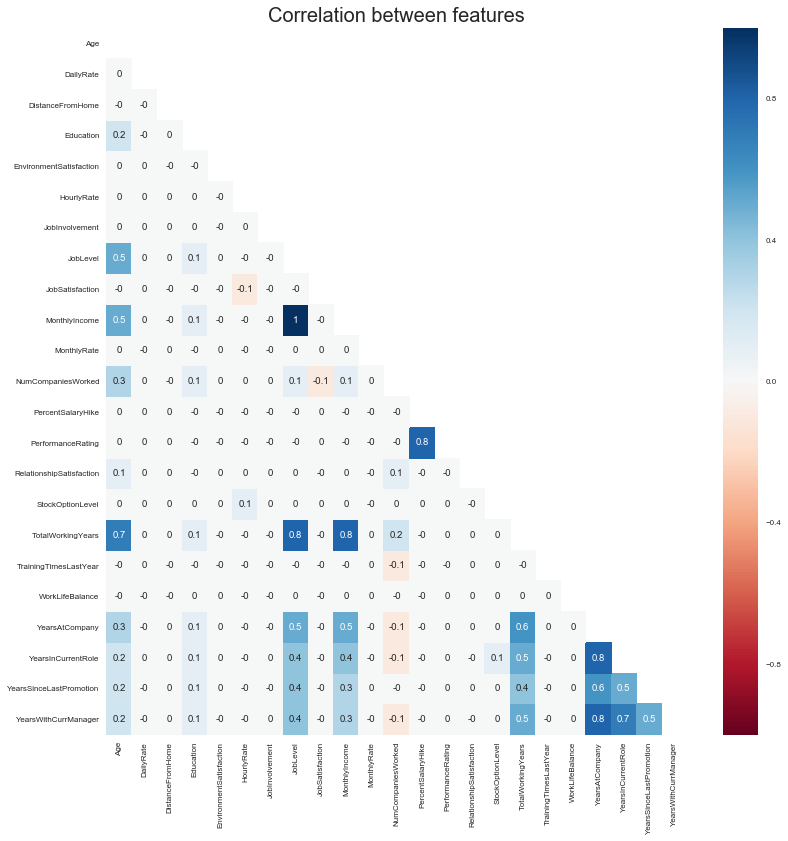

In [10]:
sns.set(style="whitegrid", font_scale=0.8)
plt.figure(figsize=(13,13))
corr = round(df.corr(),1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="RdBu", mask=mask, )
plt.title("Correlation between features", fontdict={"fontsize":20})

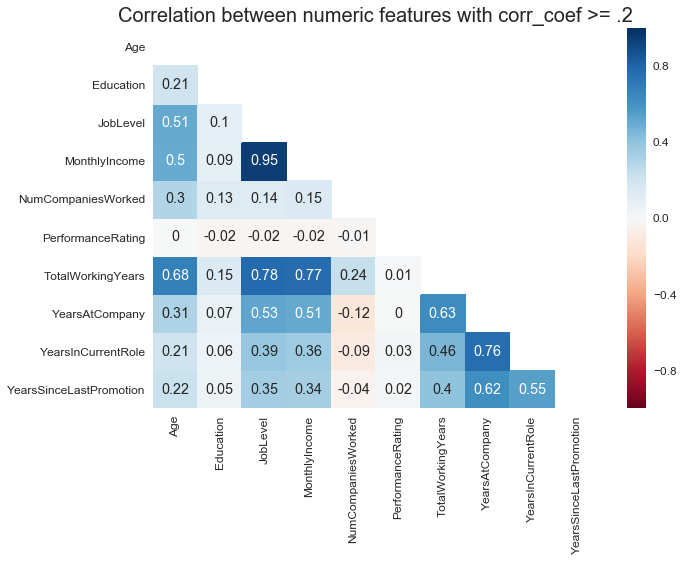

In [11]:
# calculate correlations for attributes with corr_coef >= .2 

extract_cols  = ['Age', 'Education', 'JobLevel', 
                 'MonthlyIncome', 'NumCompaniesWorked',
                 'PerformanceRating', 'TotalWorkingYears', 
                 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsSinceLastPromotion']

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10,7))
corr = round(df[extract_cols].corr(),2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="RdBu", vmin=-1, vmax=1, mask=mask)
plt.title("Correlation between numeric features with corr_coef >= .2", fontdict={"fontsize":20})